# Northern Gulf of Mexico CDOM from MODIS data
from Blake A. Schaeffer, Robyn N. Conmy, Allyn E. Duffy, Jessica Aukamp, DianeF. Yates & George Craven (2015) Northern Gulf of Mexico estuarine coloured dissolved organicmatter derived from MODIS data, International Journal of Remote Sensing, 36:8, 2219-2237

Rrs(667)/Rrs(488) band ratio algorithm to derive CDOM absorption (ag(λ)) at multiple MODIS wavebands. regression againt In situ calibration at 412, 443, 469, and 488 nm 

Tehrani NC, D'Sa EJ, Osburn CL, Bianchi TS, Schaeffer BA. Chromophoric Dissolved Organic Matter and Dissolved Organic Carbon from Sea-Viewing Wide Field-of-View Sensor (SeaWiFS), Moderate Resolution Imaging Spectroradiometer (MODIS) and MERIS Sensors: Case Study for the Northern Gulf of Mexico. Remote Sensing. 2013; 5(3):1439-1464.

aCDOM(412)=ln[(Rrs ratio−A)/B]/(−C)
for modis 
Rrs Band Ratio	= 488/555
A = 0.472
B = 1.48
C = 4.64
R2 = 0.67





In [14]:
from satpy import Scene
from satpy import find_files_and_readers
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
%matplotlib inline
import cmocean
import cmocean.cm as cmo

In [15]:
#set your path to where your data is located 
fpath = '../SAT_DATA/MODIS_AQUA_FEB_1_2022_HDF_L1/other_swat/'
myfiles = find_files_and_readers(base_dir=fpath,
                                 sensor="modis",
                                 reader='modis_l1b')
myfiles

{'modis_l1b': ['../SAT_DATA/MODIS_AQUA_FEB_1_2022_HDF_L1/other_swat\\MYD021KM.A2022032.1915.061.2022034144807.hdf',
  '../SAT_DATA/MODIS_AQUA_FEB_1_2022_HDF_L1/other_swat\\MYD03.A2022032.1915.061.2022034021135.hdf']}

There are 2 files in my test. 
Here are the download we will need:
- MYD03 - This is the georeference file I you definteively need it
- MYD021KM - bands with 1 km resolution

In [16]:
scn = Scene(filenames=myfiles)

## Here is what we will be useing as far as channels 
channel  = 	wavelenths

10 = 488 nm 

13hi = 667 nm 

13lo = 667 nm 

4 = 555 nm 

In [17]:
## list available scenes
scn.available_dataset_names()

['1',
 '10',
 '11',
 '12',
 '13hi',
 '13lo',
 '14hi',
 '14lo',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'latitude',
 'longitude',
 'satellite_azimuth_angle',
 'satellite_zenith_angle',
 'solar_azimuth_angle',
 'solar_zenith_angle']

In [18]:
# for some reason I cannot load just sub bands
#workign on it 
scn.load(['10', '13hi', '13lo', '4'])

# Resampling to highest res

In [19]:
# resample to the smallest resolution of all available channels
new_scn = scn.resample(resampler='nearest')

In [20]:
#add lat and lon info to the bands we need 
lons, lats = new_scn['4'].attrs['area'].get_lonlats()

In [21]:
# first, we are going to make the ratio of Rrs(667)/Rrs(488)
ratio = new_scn['13hi']/new_scn['10']

C:\Users\12532\AppData\Local\Temp\ipykernel_24340\1315760697.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lons, lats, ratio)


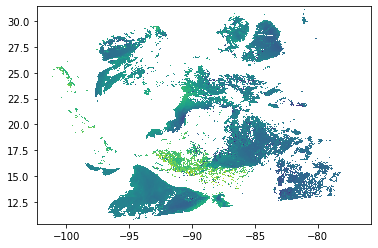

In [22]:
#now we can visualize that ratio 
plt.pcolormesh(lons, lats, ratio)

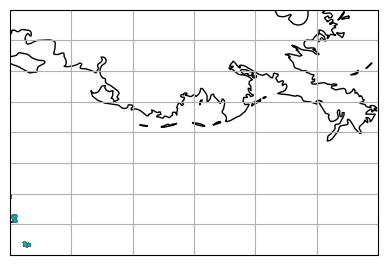

In [23]:
# in an even better way 
fig = plt.figure(figsize=(6.5, 3.25), dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-92, -89, 28, 30])
ax.pcolormesh(lons, lats, ratio, transform=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()

In [24]:
# now, we are going to calculate cdom absoption at 412 nm 
# aCDOM(412)=ln[(Rrs ratio−A)/B]/(−C) 
# for modis Rrs Band Ratio = 488/555 
#we arw getting the constants from publishes values 
Rrs_Band_Ratio = new_scn['10']/new_scn['4']
A = 0.472 
B = 1.48 
C = 4.64 
aCDOM412 = (np.log((Rrs_Band_Ratio - A)/ B))/(-C)

C:\Users\12532\miniconda3\envs\Bugs\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for a in args))
C:\Users\12532\AppData\Local\Temp\ipykernel_24340\1706046266.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(lons, lats, aCDOM412)


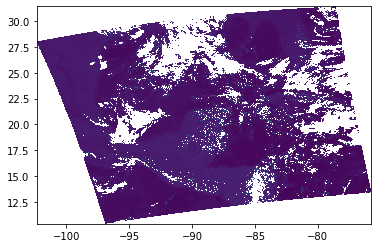

In [25]:
#now we can visualize that ratio 
plt.pcolormesh(lons, lats, aCDOM412)

C:\Users\12532\miniconda3\envs\Bugs\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for a in args))


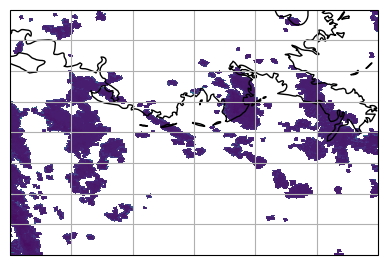

In [27]:
# in an even better way 
fig = plt.figure(figsize=(6.5, 3.25), dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-92, -89, 28, 30])
ax.pcolormesh(lons, lats, aCDOM412, transform=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()

# Notes 
a lot of the data gaps if from miing data points like clouds and stuff 

once we can blend many swaths togehter we will have better maps 